In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def introduce_cold_pixels(image, percentage, peak, std_dev, lower_limit=0):
    # Copy the image to avoid modifying the original
    modified_image = np.copy(image)
    
    # Calculate the total number of pixels to be set to zero
    total_pixels = modified_image.size
    num_dead_pixels = int(total_pixels * (percentage / 100))
    
    # Randomly choose pixel indices to set as 'dead'
    indices = np.unravel_index(
        np.random.choice(total_pixels, num_dead_pixels, replace=False),
        modified_image.shape
    )
    
    dead_pixel_values = []
    while len(dead_pixel_values) < num_dead_pixels:
        sample = np.random.normal(loc=peak, scale=std_dev)
        if lower_limit <= sample:# <= upper_limit:
            dead_pixel_values.append(sample)
    dead_pixel_values = np.array(dead_pixel_values)

    # Set chosen pixels to zero
    modified_image[indices] = dead_pixel_values

    return modified_image

In [3]:
def introduce_hot_pixels(image, percentage, peak, std_dev, upper_limit):
    # Copy the image to avoid modifying the original
    modified_image = np.copy(image)
    
    # Calculate the total number of pixels to be set as 'hot'
    total_pixels = modified_image.size
    num_hot_pixels = int(total_pixels * (percentage / 100))
    
    # Randomly choose pixel indices to set as 'hot'
    indices = np.unravel_index(
        np.random.choice(total_pixels, num_hot_pixels, replace=False),
        modified_image.shape
    )
    
    hot_pixel_values = []
    while len(hot_pixel_values) < num_hot_pixels:
        sample = np.random.normal(loc=peak, scale=std_dev)
        if sample <= upper_limit:
            hot_pixel_values.append(sample)
    hot_pixel_values = np.array(hot_pixel_values)

    # Set chosen pixels to hot values
    modified_image[indices] = hot_pixel_values
    
    return modified_image

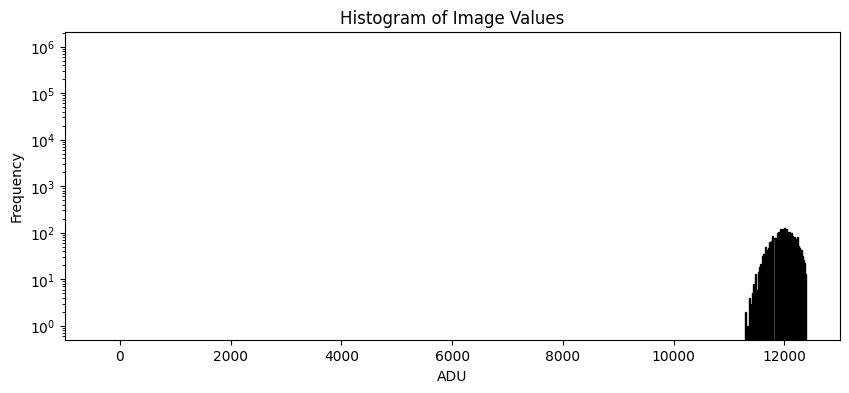

In [4]:
# Usage example
#image = np.ones((1024, 1024))  # 1024x1024 image filled with ones
temp = 15000
image_test = np.full((1024, 1024), 15000)  # 1024x1024 image filled with 12393
#image = np.random.uniform(0, 12393, size=(1024, 1024))

percentage_hot =  0.306 # % of pixels to be set as 'hot'
peak_hot = 12000       # Mean value of hot pixels
std_div_hot = 15**2    # Variance of the hot pixel values

# Apply hot pixels
#image_with_dead_pixels = introduce_dead_pixels(image, percentage_cold)
image_with_hot_pixels = introduce_hot_pixels(image_test, percentage_hot, peak_hot, std_div_hot, upper_limit=12393)

# Plot the image with the hot pixels
plt.figure(figsize=(10, 4))
plt.hist(image_with_hot_pixels.flatten(), bins=200, color='gray', edgecolor='black')
plt.title("Histogram of Image Values")
plt.xlabel("ADU")
plt.ylabel("Frequency")
plt.xlim(-1000,13000)
plt.yscale('log')
plt.show()

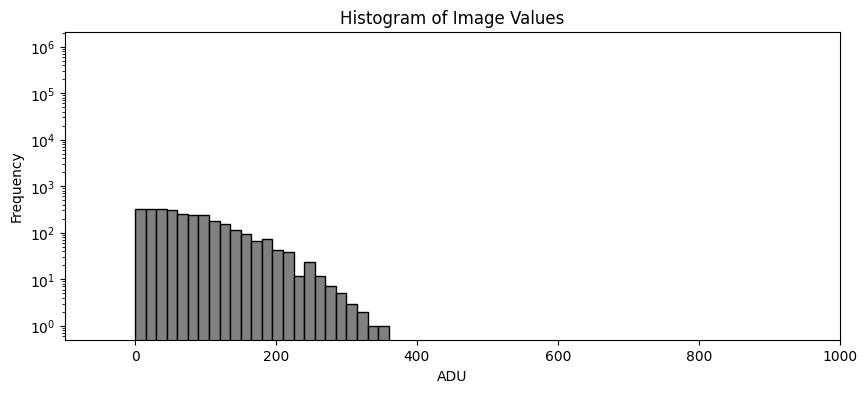

In [5]:
percentage_cold = 0.271  # % of pixels to be set as 'hot'
peak_cold = 0       # Mean value of hot pixels
std_div_cold = 10**2    # Variance of the hot pixel values


image_with_dead_pixels = introduce_cold_pixels(image_test, percentage_cold, peak_cold, std_div_cold, lower_limit=0)
plt.figure(figsize=(10, 4))
plt.hist(image_with_dead_pixels.flatten(), bins=1000, color='gray', edgecolor='black')
plt.title("Histogram of Image Values")
plt.xlabel("ADU")
plt.ylabel("Frequency")
plt.xlim(-100,1000)
plt.yscale('log')
plt.show()

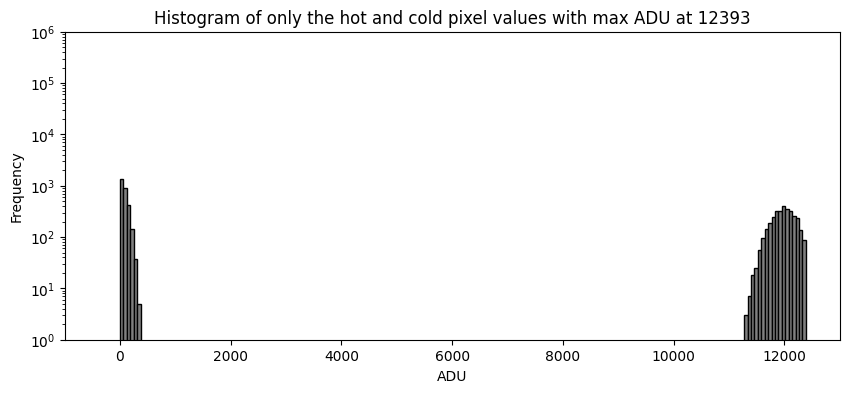

In [6]:
combined_array = np.concatenate((image_with_dead_pixels , image_with_hot_pixels))
filtered_array = combined_array[combined_array != temp]


plt.figure(figsize=(10, 4))
plt.hist(filtered_array.flatten(), bins=200, color='gray', edgecolor='black')
plt.title("Histogram of only the hot and cold pixel values with max ADU at 12393")
plt.xlabel("ADU")
plt.ylabel("Frequency")
plt.xlim(-1000,13000)
plt.ylim(1, 1e6)  
plt.yscale('log')
plt.show()

In [7]:
import numpy as np

def introduce_hot_and_dead_pixels(image, hot_percentage, dead_percentage, hot_peak, hot_std_dev, hot_upper_limit, dead_mean=0, dead_std_dev=10, dead_lower_limit=0):
    """
    Introduce hot and dead pixels into an image while ensuring no overlap in indices and setting value limits for both types of pixels.
    
    Parameters:
        image (np.ndarray): Input 2D image array.
        hot_percentage (float): Percentage of pixels to set as hot pixels.
        dead_percentage (float): Percentage of pixels to set as dead pixels.
        hot_peak (float): Mean value for the Gaussian distribution of hot pixels.
        hot_std_dev (float): Standard deviation for the Gaussian distribution of hot pixels.
        hot_lower_limit (float): Minimum value for the hot pixels.
        hot_upper_limit (float): Maximum value for the hot pixels.
        dead_mean (float): Mean value for the Gaussian distribution of dead pixels.
        dead_std_dev (float): Standard deviation for the Gaussian distribution of dead pixels.
        dead_lower_limit (float): Minimum value for the dead pixels.
        dead_upper_limit (float): Maximum value for the dead pixels.

    Returns:
        np.ndarray: Modified image with hot and dead pixels.
    """
    # Copy the image to avoid modifying the original
    modified_image = np.copy(image)

    # Calculate the total number of pixels to set as hot and dead
    total_pixels = modified_image.size
    num_hot_pixels = int(total_pixels * (hot_percentage / 100))
    num_dead_pixels = int(total_pixels * (dead_percentage / 100))

    # Randomly select unique indices for hot and dead pixels
    hot_indices = np.random.choice(total_pixels, num_hot_pixels, replace=False)
    remaining_indices = np.setdiff1d(np.arange(total_pixels), hot_indices)
    dead_indices = np.random.choice(remaining_indices, num_dead_pixels, replace=False)

    # Convert indices to the original shape
    hot_indices = np.unravel_index(hot_indices, modified_image.shape)
    dead_indices = np.unravel_index(dead_indices, modified_image.shape)

    # Generate hot pixel values from a Gaussian distribution, clipped to the specified range
    hot_pixel_values = []
    while len(hot_pixel_values) < num_hot_pixels:
        sample = np.random.normal(loc=hot_peak, scale=np.sqrt(hot_std_dev))
        if sample <= hot_upper_limit:
            hot_pixel_values.append(sample)
    hot_pixel_values = np.array(hot_pixel_values)

    # Generate dead pixel values from a Gaussian distribution within the [dead_lower_limit, dead_upper_limit]
    dead_pixel_values = []
    while len(dead_pixel_values) < num_dead_pixels:
        sample = np.random.normal(loc=dead_mean, scale=dead_std_dev)
        if dead_lower_limit <= sample:
            dead_pixel_values.append(sample)
    dead_pixel_values = np.array(dead_pixel_values)

    # Set hot pixel values
    modified_image[hot_indices] = hot_pixel_values

    # Set dead pixel values
    modified_image[dead_indices] = dead_pixel_values

    return modified_image


In [12]:
# Create a 1024x1024 array filled with a constant value
image = np.random.normal(loc=5500, scale=100, size=(1024, 1024))

# Introduce hot and dead pixels into the image
modified_image = introduce_hot_and_dead_pixels(
    image,
    hot_percentage=0.306,  # 1% of the pixels will be hot
    dead_percentage=0.217,  # 1% of the pixels will be dead
    hot_peak=12000,
    hot_std_dev=150**2,
    hot_upper_limit=12393,  # Hot pixel values must be at most 10000
    dead_mean=1,
    dead_std_dev=10**2,
    dead_lower_limit=0,  # Dead pixel values must be at least 0
)


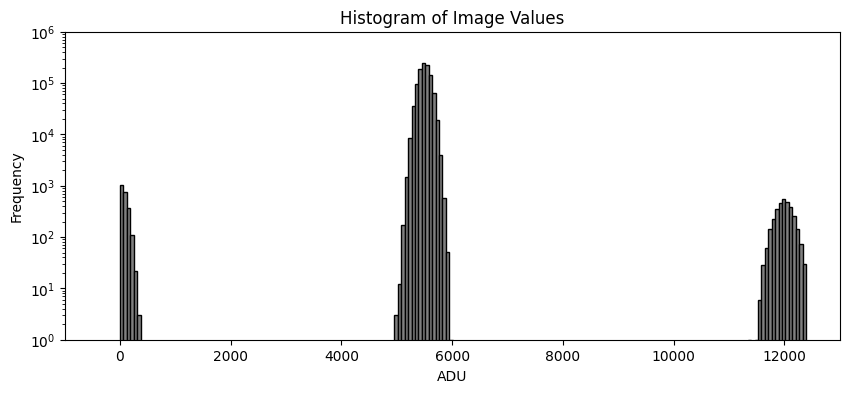

In [13]:
plt.figure(figsize=(10, 4))
plt.hist(modified_image.ravel(), bins=200, color='gray', edgecolor='black')
plt.title("Histogram of Image Values")
plt.xlabel("ADU")
plt.ylabel("Frequency")
plt.xlim(-1000,13000)
plt.ylim(1, 1e6)  
plt.yscale('log')
plt.show()

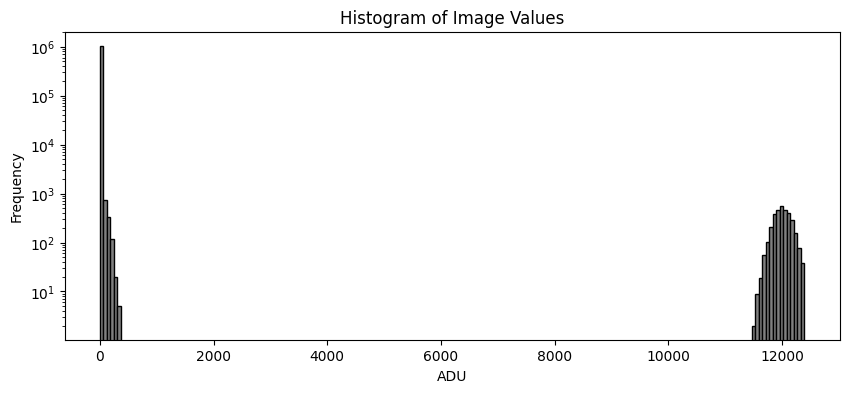

In [10]:
mean=5500, 
std_dev=100
size=(1024, 1024)

gaussian_samples = np.random.normal(loc=mean, scale=std_dev, size=(1024, 1024))
image = np.log10(gaussian_samples)  # Apply the exponential function to each element

modified_image = introduce_hot_and_dead_pixels(
    image,
    hot_percentage=0.306,  # 1% of the pixels will be hot
    dead_percentage=0.217,  # 1% of the pixels will be dead
    hot_peak=12000,
    hot_std_dev=150**2,
    hot_upper_limit=12393,  # Hot pixel values must be at most 10000
    dead_mean=0,
    dead_std_dev=10**2,
    dead_lower_limit=0,  # Dead pixel values must be at least 0
)

plt.figure(figsize=(10, 4))
plt.hist(modified_image.ravel(), bins=200, color='gray', edgecolor='black')
plt.title("Histogram of Image Values")
plt.xlabel("ADU")
plt.ylabel("Frequency")
#plt.xlim(-1000,13000)
#plt.ylim(1, 1e6)  
plt.yscale('log')
plt.show()

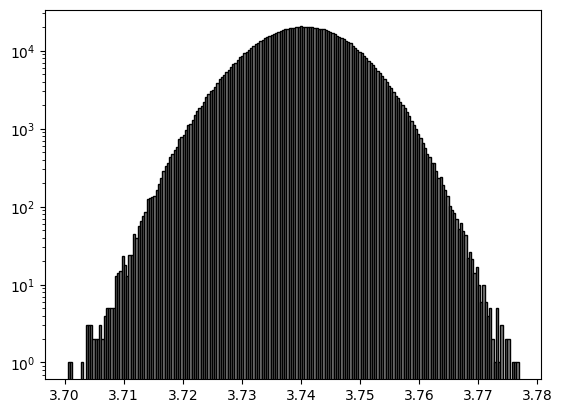

In [11]:
gaussian_samples = np.log10(np.random.normal(loc=mean, scale=std_dev, size=(1024, 1024)))
plt.hist(gaussian_samples.ravel(), bins=200, color='gray', edgecolor='black')
plt.yscale('log')